CHI-SQUARED ANALYSIS RESULTS:
A_best = 1344.35
minchi2 =  17.47
N =  5
good fit range for minchi2 = [ 1.84 , 8.16 ]


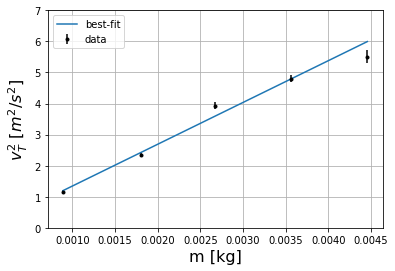

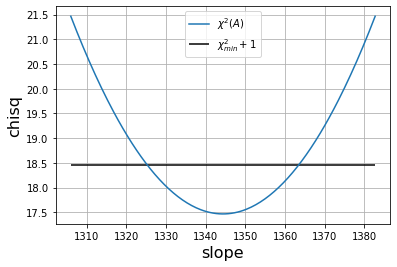

In [6]:
# 1dchi2.py version 5/11/20
# This script does chi-square curve fitting to the 1-parameter linear model y = Ax
#
# Three arrays are needed:
    # x is an array of mean values for the independent variable
    # y is an array of mean values for the dependent variable
    # y_err is an array of standard errors (SD/(sqrt of N)) for y
#
# Note this script only handles errors on dependent (y) variable.
#
# This script reproduces Figs. 21 and 22 in our book:
# "Chi-Squared Data Analysis and Model Testing for Beginners"
# Oxford University Press, 2019.
#
# SOFTWARE DEPENDENCIES: Numpy, Matplotlib
# ---------------------------------------------------------------------------
# Copyright (C) 2020 Carey Witkov and Keith Zengel

# This program is free software: you can redistribute it and/or modify it under 
# the terms of the GNU General Public License as published by the Free Software 
# Foundation; either version 3 of the License, or (at your option) any later version.

# This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; 
# without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. 
# See the GNU General Public License for more details.

# You should have received a copy of the GNU General Public License along with this program. 
# If not, see https://www.gnu.org/licenses/.
# ---------------------------------------------------------------------------
import matplotlib.pyplot as plt
from numpy import *
import numpy as np

# Measure the mass of each set of coffee filters
m = np.array([0.89, 1.80, 2.67, 3.57, 4.46])*.001
g = 9.81

# Measure the terminal velocity for each set of filters 5 times and record the values
v1 = np.array([1.150, 1.026, 1.014, 1.134, 1.010])
v2 = np.array([1.443, 1.492, 1.583, 1.563, 1.589])
v3 = np.array([2.031, 1.939, 1.941, 2.067, 1.941])
v4 = np.array([2.181, 2.202, 2.199, 2.109, 2.269])
v5 = np.array([2.507, 2.292, 2.303, 2.364, 2.267])

v = np.array([mean(v1), mean(v2), mean(v3), mean(v4), mean(v5)])
sigma_v=np.array([np.std(v1, ddof=1), np.std(v2, ddof=1), np.std(v3, ddof=1), np.std(v4, ddof=1), np.std(v5, ddof=1)]/np.sqrt(5));

# x,y data arrays and y-error array
x = m
y = v**2
yerr = 2*v*sigma_v

# calculate sums needed to obtain chi-square
s_yy=sum((y**2)/(yerr**2));
s_xx=sum((x**2)/(yerr**2));
s_xy=sum((y*x)/(yerr**2));

A_best = s_xy/s_xx
sigma_A = 1/sqrt(s_xx)
minchi2 = s_yy - s_xy**2/s_xx

# plot data with errorbars 
plt.figure()
plt.errorbar(x,y,yerr,linestyle='None',fmt='.k', label ="data")
plt.xlabel('m [kg]', fontsize=16)
plt.ylabel('$v^{2}_{T}$ $[m^{2}/s^{2}]$', fontsize=16)
plt.grid(True)
plt.plot(x, A_best*x, label="best-fit")
plt.ylim(0,7)

# add legend
plt.legend(loc="upper left")

# create parameter range for slope
xmin = A_best-2*sigma_A
ymin = A_best+2*sigma_A
A = np.linspace(xmin,ymin,200)

# calculate chi-square 
chi2 = s_yy + (A**2)*(s_xx) - 2*A*s_xy 
     
# display chi-square vs. slope
plt.figure()

plt.plot(A,chi2, label='$\chi^{2}(A)$')
plt.xlabel('slope',fontsize=16)
plt.ylabel('chisq',fontsize=16)
plt.grid(True)
plt.hlines(minchi2+1,xmin,ymin, label='$\chi^{2}_{min} + 1$' )

# add legend
plt.legend(loc="upper center")

# display main results
print("CHI-SQUARED ANALYSIS RESULTS:")
A_best_float = "{:.2f}".format(A_best)
minchi2_float = "{:.2f}".format(minchi2)
print("A_best =",A_best_float)
print("minchi2 = ",minchi2_float)
N = len(x)
print("N = ", N)
N_min_float = "{:.2f}".format(N-sqrt(2*N))
N_max_float = "{:.2f}".format(N+sqrt(2*N))
print("good fit range for minchi2 = [",N_min_float, ",",N_max_float,"]")
